In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aagen\AppData\Local\Temp\ipykernel_12356\3025091036.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  hot_cmap = plt.cm.get_cmap('hot')


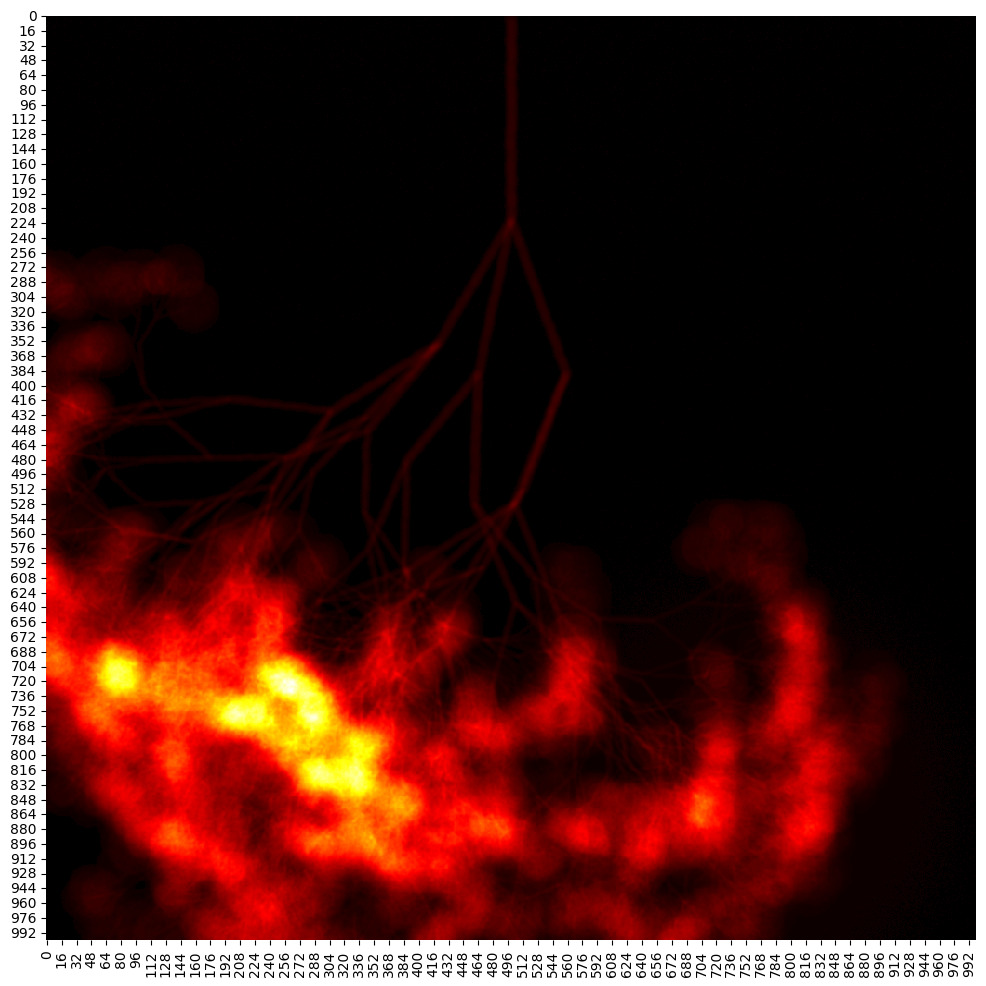

In [5]:
from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

def draw_organic_line(canvas, start, end, thickness, roughness=1.5):
    """Draws a wobbly, organic-looking line."""
    num_points = int(np.linalg.norm(np.array(start) - np.array(end))) * 2
    if num_points < 2: return

    rows, cols = np.linspace(start[0], end[0], num_points), np.linspace(start[1], end[1], num_points)
    
    # Add smoothed random noise for a wobbly effect
    noise_r = gaussian_filter(np.random.normal(0, roughness, num_points), sigma=5)
    noise_c = gaussian_filter(np.random.normal(0, roughness, num_points), sigma=5)
    
    rows += noise_r
    cols += noise_c

    for i in range(num_points):
        r, c = int(rows[i]), int(cols[i])
        if 0 <= r < canvas.shape[0] and 0 <= c < canvas.shape[1]:
            # Draw a circular brush tip
            for dr in range(-thickness, thickness + 1):
                for dc in range(-thickness, thickness + 1):
                    if dr**2 + dc**2 <= thickness**2 and 0 <= r + dr < canvas.shape[0] and 0 <= c + dc < canvas.shape[1]:
                        canvas[r + dr, c + dc] += 1

def draw_cloud_leaves(canvas, center, radius, density):
    """Draws a soft, cloud-like cluster of leaves."""
    r_start, r_end = max(0, int(center[0] - radius)), min(canvas.shape[0], int(center[0] + radius))
    c_start, c_end = max(0, int(center[1] - radius)), min(canvas.shape[1], int(center[1] + radius))
    
    # Add a check to prevent negative dimensions if the patch is off-screen.
    if r_start >= r_end or c_start >= c_end:
        return
    
    y, x = np.ogrid[r_start:r_end, c_start:c_end]
    dist_sq = (y - center[0])**2 + (x - center[1])**2
    mask = dist_sq <= radius**2
    
    leaf_patch = np.zeros((r_end - r_start, c_end - c_start), dtype=np.float32)
    leaf_patch[mask] = np.random.uniform(0, density, size=np.count_nonzero(mask))
    canvas[r_start:r_end, c_start:c_end] += leaf_patch

def draw_artistic_tree(canvas, start, angle, length, depth):
    """Recursively draws a highly detailed and artistic tree."""
    if depth == 0 or length < 5:
        if length > 2: draw_cloud_leaves(canvas, start, radius=np.random.randint(15, 30), density=4.0)
        return

    end_row = start[0] - length * np.sin(angle)
    end_col = start[1] + length * np.cos(angle)
    
    thickness = max(1, int(depth / 1.8))
    draw_organic_line(canvas, start, (end_row, end_col), thickness)

    # Randomly spawn falling leaves
    if np.random.random() < 0.05:
        fall_r, fall_c = int(end_row + np.random.randint(20, 100)), int(end_col + np.random.randint(-20, 20))
        if 0 <= fall_r < canvas.shape[0] and 0 <= fall_c < canvas.shape[1]: canvas[fall_r, fall_c] += 5

    # Create 2 or 3 new branches
    for _ in range(np.random.choice([2, 2, 3])):
        new_length = length * np.random.uniform(0.7, 0.9)
        new_angle = angle + np.random.uniform(-np.pi/4, np.pi/4)
        draw_artistic_tree(canvas, (end_row, end_col), new_angle, new_length, depth - 1)

# --- Main Setup ---
size = 1000
canvas = np.zeros((size, size), dtype=np.float32)

# 1. Add Atmosphere (Gradient + Moon)
y = np.linspace(0, 1, size)
canvas += np.tile(y[:, np.newaxis], (1, size)) * 0.5
yy, xx = np.ogrid[:size, :size]
moon_center, moon_radius = (150, 750), 60
dist_from_moon = (xx - moon_center[1])**2 + (yy - moon_center[0])**2
canvas[dist_from_moon < moon_radius**2] += 10
canvas += 4 * np.exp(-0.00003 * dist_from_moon)

# 2. Draw the Tree
start_pos = (size - 1, size // 2)
draw_artistic_tree(canvas, start_pos, angle=np.pi/2, length=220, depth=11)

# 3. Post-Processing
canvas_blurred = gaussian_filter(canvas, sigma=1.0)
noise = np.random.normal(0, 0.3, (size, size))
final_art = canvas_blurred + noise

# --- Visualization ---
# Create a custom 'hot' colormap with a black background
hot_cmap = plt.cm.get_cmap('hot')
custom_colors = hot_cmap(np.linspace(0, 1, 256))
custom_colors[0] = (0, 0, 0, 1) # Black for zero values
custom_hot = ListedColormap(custom_colors)

plt.figure(figsize=(12, 12))
sns.heatmap(np.flipud(final_art), cmap=custom_hot, cbar=False)
plt.show()

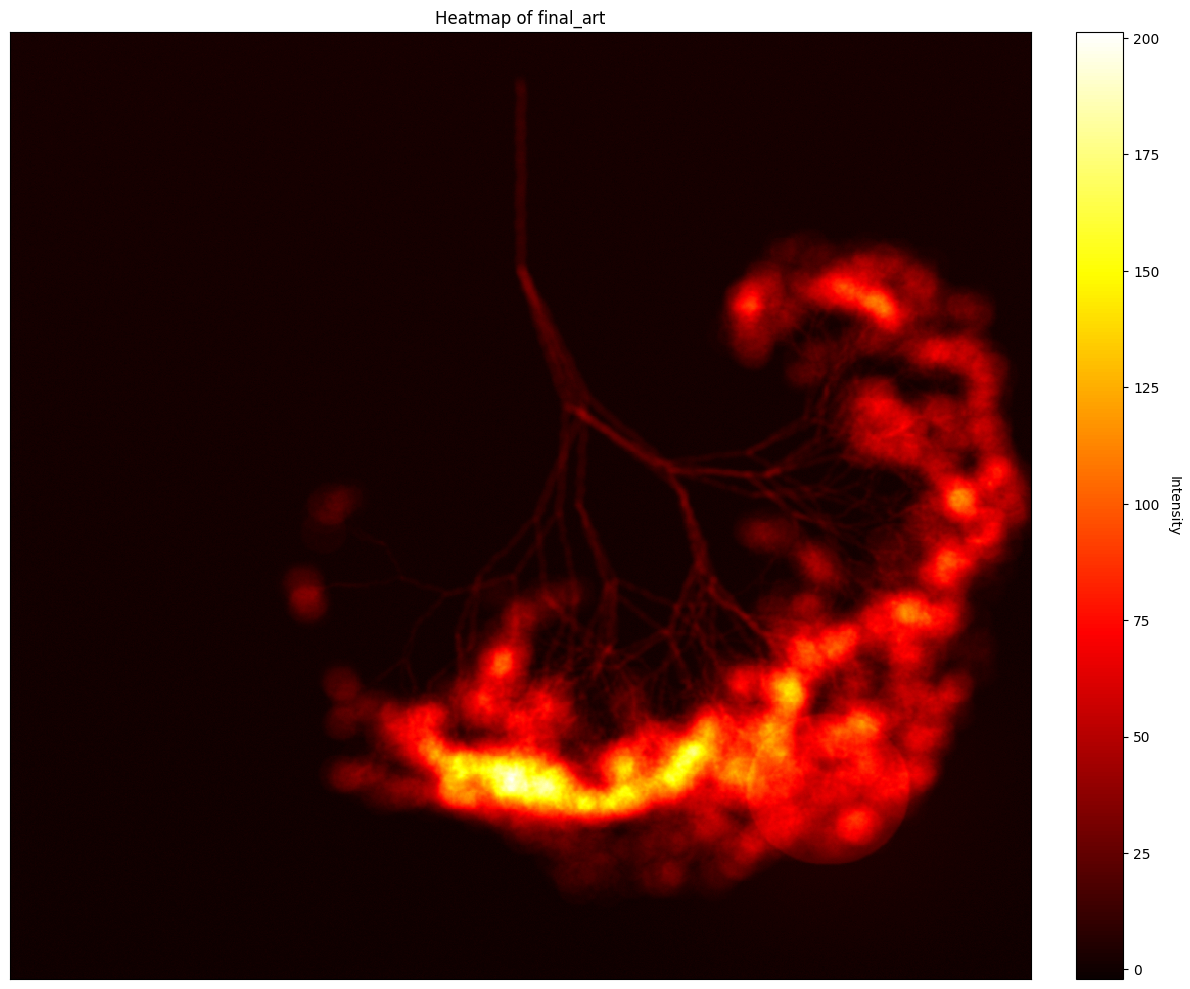

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def draw_organic_line(canvas, start, end, thickness, roughness=0.5):
    """
    Draws a line that wobbles slightly to simulate organic growth (bark/branches).
    """
    num_points = int(np.linalg.norm(np.array(start) - np.array(end)))
    if num_points == 0:
        return

    # Linear interpolation
    rows = np.linspace(start[0], end[0], num_points)
    cols = np.linspace(start[1], end[1], num_points)
    
    # Add noise to the path
    noise_r = np.random.normal(0, roughness, num_points)
    noise_c = np.random.normal(0, roughness, num_points)
    
    # Smooth the noise so it curves rather than jitters frantically
    noise_r = gaussian_filter(noise_r, sigma=2)
    noise_c = gaussian_filter(noise_c, sigma=2)

    rows += noise_r
    cols += noise_c

    for i in range(num_points):
        r, c = int(rows[i]), int(cols[i])
        
        # Draw with thickness
        # We vary density to simulate cylindrical volume (darker in center)
        for dr in range(-thickness, thickness + 1):
            for dc in range(-thickness, thickness + 1):
                if 0 <= r + dr < canvas.shape[0] and 0 <= c + dc < canvas.shape[1]:
                    # Circular brush tip
                    if dr**2 + dc**2 <= thickness**2:
                        canvas[r + dr, c + dc] += 0.8  # Add wood texture value

def draw_cloud_leaves(canvas, center, radius, density):
    """
    Draws a cluster of leaves using a gaussian blob approach for a 'soft' look.
    """
    r_start = int(max(0, center[0] - radius))
    r_end = int(min(canvas.shape[0], center[0] + radius))
    c_start = int(max(0, center[1] - radius))
    c_end = int(min(canvas.shape[1], center[1] + radius))

    # Create a mini grid for the leaf cluster
    y, x = np.ogrid[r_start:r_end, c_start:c_end]
    
    # Distance from center
    dist_sq = (y - center[0])**2 + (x - center[1])**2
    mask = dist_sq <= radius**2
    
    # Add random noise within the circle
    leaf_patch = np.zeros((r_end - r_start, c_end - c_start))
    leaf_patch[mask] = np.random.uniform(0, density, size=np.count_nonzero(mask))
    
    # Add to canvas
    canvas[r_start:r_end, c_start:c_end] += leaf_patch

def draw_artistic_tree(canvas, start_point, angle, length, depth, max_depth):
    """
    Recursively draws the tree with organic logic.
    """
    # Base case
    if depth == 0 or length < 2:
        # Draw leaves as "clouds" or "ink blots" at the tips
        draw_cloud_leaves(canvas, start_point, radius=np.random.randint(10, 25), density=3.0)
        return

    # Calculate end point
    # Add slight curvature/gravity effect based on angle
    gravity_bias = 0.05 * np.cos(angle) 
    
    end_row = start_point[0] - length * np.sin(angle + gravity_bias)
    end_col = start_point[1] + length * np.cos(angle + gravity_bias)
    
    # Determine thickness based on depth (thicker at bottom)
    thickness = max(1, int(depth / 1.5))
    
    # Draw the branch
    draw_organic_line(canvas, start_point, (end_row, end_col), thickness, roughness=2.0)

    # --- Randomness and Recursion ---
    
    # Randomly spawn falling leaves (particles)
    if np.random.random() < 0.1: # 10% chance per branch
        fall_r = int(end_row + np.random.randint(20, 100))
        fall_c = int(end_col + np.random.randint(-20, 20))
        if 0 <= fall_r < canvas.shape[0] and 0 <= fall_c < canvas.shape[1]:
            canvas[fall_r, fall_c] += 5 # Bright spot for falling leaf

    # Bifurcation
    # Random number of branches (2 or 3) to look natural
    num_branches = np.random.choice([2, 2, 3])
    
    for _ in range(num_branches):
        # Change length and angle
        new_length = length * np.random.uniform(0.70, 0.85)
        
        # Angle variation: Subtracting depth creates "gnarled" look 
        # as branches twist more at the ends
        delta_angle = np.deg2rad(np.random.uniform(15, 45))
        
        # Randomly choose left or right deviation
        sign = np.random.choice([-1, 1])
        new_angle = angle + (sign * delta_angle)
        
        draw_artistic_tree(canvas, (end_row, end_col), new_angle, new_length, depth - 1, max_depth)

# --- Main Setup ---
width, height = 1000, 1000
canvas = np.zeros((height, width))

# 1. Add Atmosphere (Gradient Background + Moon)
y = np.linspace(0, 1, height)
gradient = np.tile(y[:, np.newaxis], (1, width)) * 2 # Simple vertical gradient
canvas += gradient

# Add a Moon/Sun (Soft light source)
yy, xx = np.ogrid[:height, :width]
circle_center = (200, 800)
circle_radius = 80
dist_from_moon = (xx - circle_center[1])**2 + (yy - circle_center[0])**2
mask_moon = dist_from_moon < circle_radius**2
canvas[mask_moon] += 15 # Bright moon base
# Moon Glow
canvas += 5 * np.exp(-0.00005 * dist_from_moon)

# 2. Draw the Tree
start_pos = (height - 50, width // 2) # Start at bottom center
initial_angle = np.pi / 2 # Straight up
initial_length = 200
max_recursion = 10

draw_artistic_tree(canvas, start_pos, initial_angle, initial_length, max_recursion, max_recursion)

# 3. Post-Processing for "Art" Feel
# Add Gaussian Blur to blend the sharp pixel lines into "ink"
# Sigma=1 keeps details but softens edges
canvas_blurred = gaussian_filter(canvas, sigma=1.2)

# Add "Paper Grain" noise
noise = np.random.normal(0, 0.5, (height, width))
final_art = canvas_blurred + noise

# --- Visualization ---
plt.figure(figsize=(12, 10))

# Show as a proper heatmap with a colorbar and no axes ticks
ax = plt.gca()
heat = ax.imshow(final_art, cmap='hot', origin='lower', interpolation='nearest', aspect='auto')

# Add colorbar for scale
cbar = plt.colorbar(heat, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Intensity', rotation=270, labelpad=15)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Heatmap of final_art')

plt.tight_layout()
plt.show()